# Análise de variação de temperatura global
- Top 10 variação de temperatura nos últimos 10 anos
- Análise aprofundada no Brasil
- Checar correlações com o aumento de temperatura (Emissão de CO2)
- Comparar mudança baseado em estações (cálculo de estatísticas e regressão linear)
- Fazer mapa

**Fonte de dados:** 

- Temperaturas : http://www.fao.org/faostat/en/#data/ET/metadata 
- Mauna Loa (CO2) : https://gml.noaa.gov/ccgg/trends/data.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import linear_model
import plotly.express as px

base = pd.read_csv(r'Temperaturas\FAOSTAT_data_1-10-2022.csv', encoding = 'utf-8-sig')


In [2]:
base.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,?C,1.827,Fc,Calculated data


In [3]:
brazil_data = base[base['Area'] == 'Brazil']
brazil_data.head()

#brazil_data.isna().sum()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
25432,ET,Temperature change,21,Brazil,7271,Temperature change,7001,January,1961,1961,?C,-0.104,Fc,Calculated data
25433,ET,Temperature change,21,Brazil,7271,Temperature change,7001,January,1962,1962,?C,-0.053,Fc,Calculated data
25434,ET,Temperature change,21,Brazil,7271,Temperature change,7001,January,1963,1963,?C,0.077,Fc,Calculated data
25435,ET,Temperature change,21,Brazil,7271,Temperature change,7001,January,1964,1964,?C,-0.014,Fc,Calculated data
25436,ET,Temperature change,21,Brazil,7271,Temperature change,7001,January,1965,1965,?C,-0.518,Fc,Calculated data


In [4]:
dict_estacoes = {
    'Dec?Jan?Feb': 'Verão',
    'Mar?Apr?May': 'Outono',
    'Jun?Jul?Aug': 'Inverno',
    'Sep?Oct?Nov': 'Primavera'
}

months = ["January", "February", "March", "April", "May", "June", "July", "August","September", "October", "November", "December", 'Meteorological year']

for month in months:
    brazil_data = brazil_data[brazil_data['Months']!= month]

brazil_data['Estação'] = brazil_data['Months'].apply(lambda x: dict_estacoes[x])
brazil_data.drop('Months', axis = 1, inplace = True)

In [5]:
brazil_data = brazil_data[['Year','Value','Estação']]
brazil_data.rename(columns={'Year': 'Ano', 'Value':'Valor'}, inplace=True)
brazil_data

,Ano,Valor,Estação
26152,1961,-0.104,Verão
26153,1962,-0.097,Verão
26154,1963,-0.118,Verão
26155,1964,0.051,Verão
26156,1965,-0.389,Verão
...,...,...,...
26387,2016,1.216,Primavera
26388,2017,1.489,Primavera
26389,2018,1.447,Primavera
26390,2019,1.790,Primavera


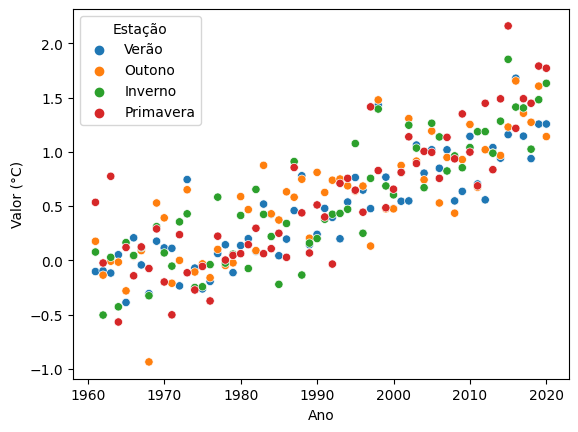

In [6]:
sns.scatterplot(data = brazil_data,x='Ano',y='Valor',hue = 'Estação')
plt.ylabel('Valor (°C)')
plt.show()

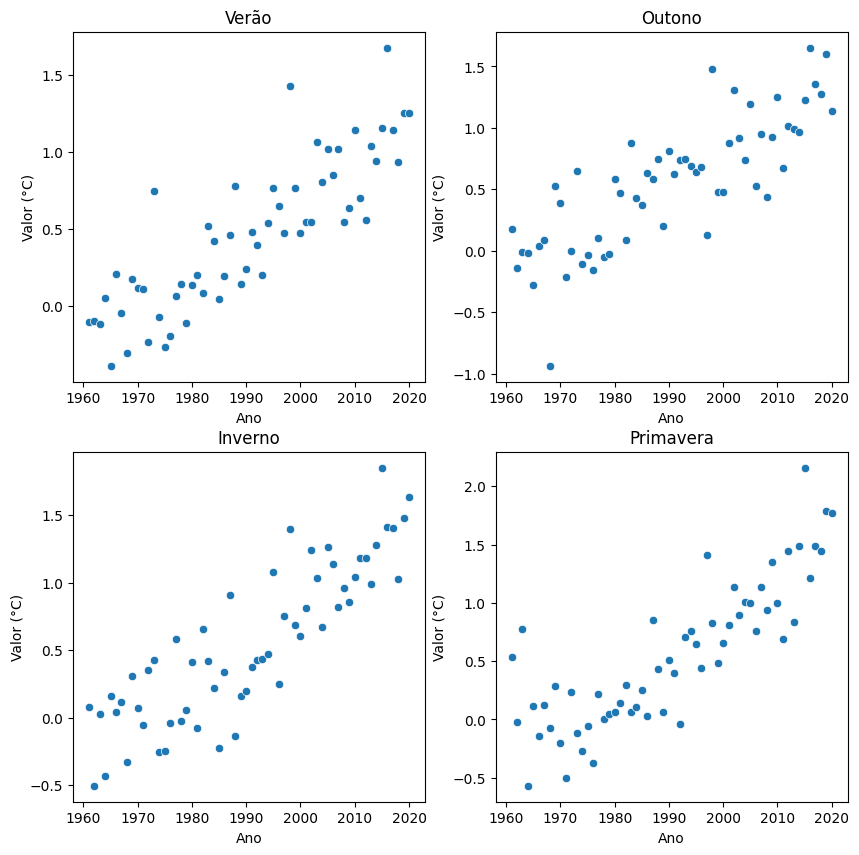

In [7]:
i=1
plt.figure(figsize=(10,10))
for estacao in dict_estacoes.values():
    plt.subplot(2, 2, i)
    plt.ylabel('Valor (°C)')
    sns.scatterplot(data = brazil_data[brazil_data.Estação == estacao],x='Ano',y='Valor')
    plt.title(estacao)
    i+=1
plt.show()

# Análises estatísticas

In [8]:
# Separação dos dados por estação do ano
data_verao = brazil_data[brazil_data.Estação == 'Verão']
data_outono = brazil_data[brazil_data.Estação == 'Outono']
data_inverno = brazil_data[brazil_data.Estação == 'Inverno']
data_primavera = brazil_data[brazil_data.Estação == 'Primavera']

In [9]:
data_x = data_verao['Ano'].array.reshape((-1,1))
data_verao_y = data_verao['Valor']
data_outono_y = data_outono['Valor']
data_inverno_y = data_inverno['Valor']
data_primavera_y = data_primavera['Valor']

In [10]:
regr_verao = linear_model.LinearRegression().fit(data_x, data_verao_y)
x = np.linspace(1961,2020,60)
y = regr_verao.coef_*x + regr_verao.intercept_

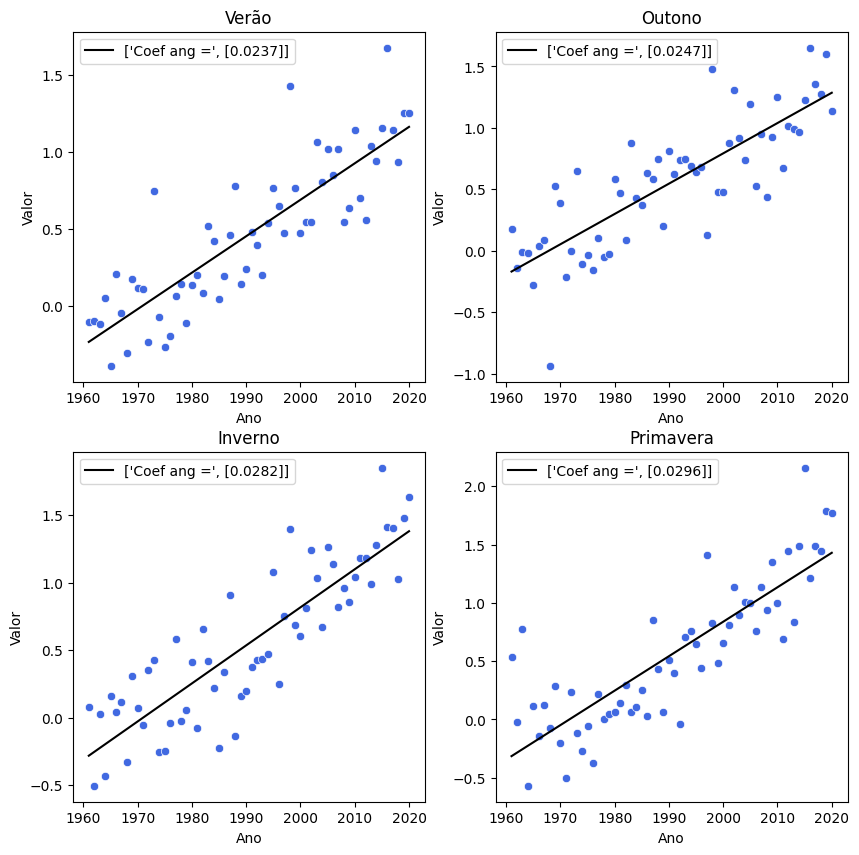

In [11]:
i=1
plt.figure(figsize=(10,10))
for estacao in dict_estacoes.values():
    regr = linear_model.LinearRegression().fit(data_x, brazil_data[brazil_data.Estação == estacao]['Valor'])
    y = regr.coef_*x + regr.intercept_
    plt.subplot(2, 2, i)
    sns.scatterplot(data = brazil_data[brazil_data.Estação == estacao],x='Ano',y='Valor', legend=False, color='royalblue')
    plt.plot(x,y,color='black', label=['Coef ang =',np.round(regr.coef_.tolist(),4).tolist()])
    plt.legend()
    plt.title(estacao)
    i+=1
plt.show()

In [12]:
var = 0
for i in range(len(x)):
  var += (brazil_data[brazil_data.Estação == estacao]['Valor'].array[i]-y[i])**2/(len(x)-1)
desv_pad = np.sqrt(var)
print(var)
print(desv_pad)

0.11401654077199716
0.33766335420355753


In [13]:
df_mundo = base.copy()
df_mundo.drop(columns=['Months Code', 'Element Code', 'Element', 'Unit', 'Area Code (FAO)',
                       'Domain Code', 'Flag', 'Flag Description', 'Domain','Year Code'], inplace=True)

In [14]:

df_mundo = df_mundo[df_mundo['Months'].str.contains('Meteorological year') == False]

df_mundo = df_mundo[~df_mundo['Months'].isin(['Dec?Jan?Feb'])]
df_mundo = df_mundo[~df_mundo['Months'].isin(['Mar?Apr?May'])]
df_mundo = df_mundo[~df_mundo['Months'].isin(['Jun?Jul?Aug'])]
df_mundo = df_mundo[~df_mundo['Months'].isin(['Sep?Oct?Nov'])]
df_mundo

,Area,Months,Year,Value
0,Afghanistan,January,1961,0.746
1,Afghanistan,January,1962,0.009
2,Afghanistan,January,1963,2.695
3,Afghanistan,January,1964,-5.277
4,Afghanistan,January,1965,1.827
...,...,...,...,...
229620,Zimbabwe,December,2016,1.298
229621,Zimbabwe,December,2017,0.709
229622,Zimbabwe,December,2018,1.475
229623,Zimbabwe,December,2019,2.322


In [15]:
media_mundo = np.zeros(60)
mediana_mundo = np.zeros(60)
desv_pad_mundo = np.zeros(60)
var_mundo = np.zeros(60)
max_mundo = np.zeros(60)
min_mundo = np.zeros(60)

for i in range(1961, 2021):
    df_tempo = df_mundo[df_mundo['Year'] == i]
    
    # Verifique se a coluna 'Value' contém valores numéricos antes de calcular as estatísticas
    if not df_tempo['Value'].empty and pd.to_numeric(df_tempo['Value'], errors='coerce').count() > 0:
        media_mundo[i - 1961] = df_tempo['Value'].mean()
        mediana_mundo[i - 1961] = df_tempo['Value'].median()
        desv_pad_mundo[i - 1961] = df_tempo['Value'].std()
        var_mundo[i - 1961] = df_tempo['Value'].var()
        max_mundo[i - 1961] = df_tempo['Value'].max()
        min_mundo[i - 1961] = df_tempo['Value'].min()
    else:
        # Lidar com casos em que a coluna 'Value' não contém valores numéricos
        media_mundo[i - 1961] = np.nan
        mediana_mundo[i - 1961] = np.nan
        desv_pad_mundo[i - 1961] = np.nan
        var_mundo[i - 1961] = np.nan
        max_mundo[i - 1961] = np.nan
        min_mundo[i - 1961] = np.nan


Text(0.5, 1.0, 'Média de mudança de temperatura mundial')

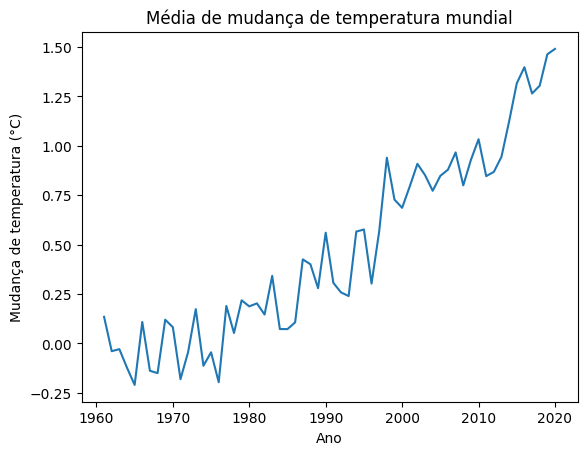

In [16]:
plt.plot(x,media_mundo)
plt.xlabel('Ano')
plt.ylabel('Mudança de temperatura (°C)')
plt.title('Média de mudança de temperatura mundial')

Text(0.5, 1.0, 'Mediana de mudança de temperatura mundial')

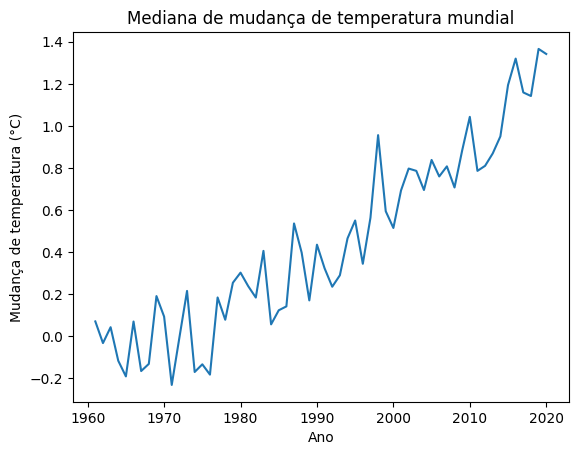

In [17]:
plt.plot(x,mediana_mundo)
plt.xlabel('Ano')
plt.ylabel('Mudança de temperatura (°C)')
plt.title('Mediana de mudança de temperatura mundial')

Text(0.5, 1.0, 'Desvio padrão de mudança de temperatura mundial')

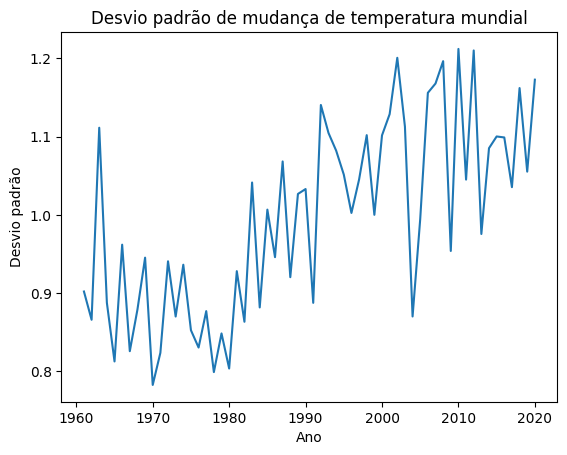

In [18]:
plt.plot(x,desv_pad_mundo)
plt.xlabel('Ano')
plt.ylabel('Desvio padrão')
plt.title('Desvio padrão de mudança de temperatura mundial')

Text(0.5, 1.0, 'Variação de mudança de temperatura mundial')

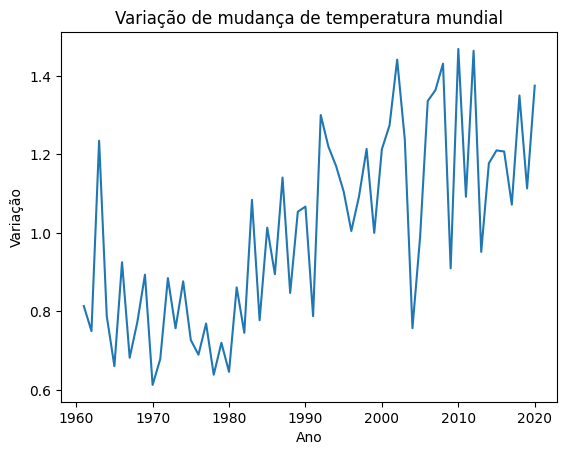

In [19]:
plt.plot(x,var_mundo)
plt.xlabel('Ano')
plt.ylabel('Variação')
plt.title('Variação de mudança de temperatura mundial')

Text(0.5, 1.0, 'Variação de mudança de temperatura mundial')

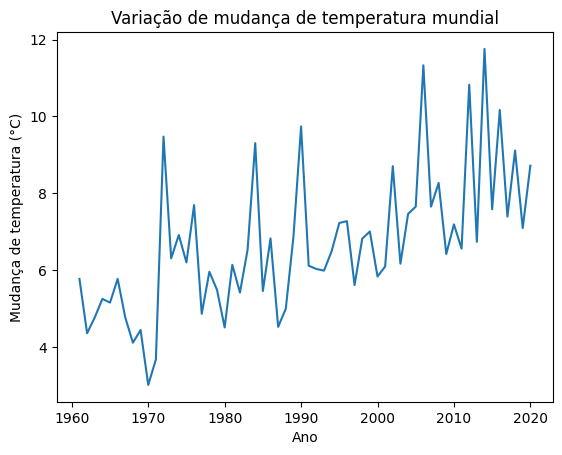

In [20]:
plt.plot(x,max_mundo)
plt.xlabel('Ano')
plt.ylabel('Mudança de temperatura (°C)')
plt.title('Variação de mudança de temperatura mundial')

Text(0.5, 1.0, 'Variação de mudança de temperatura mundial')

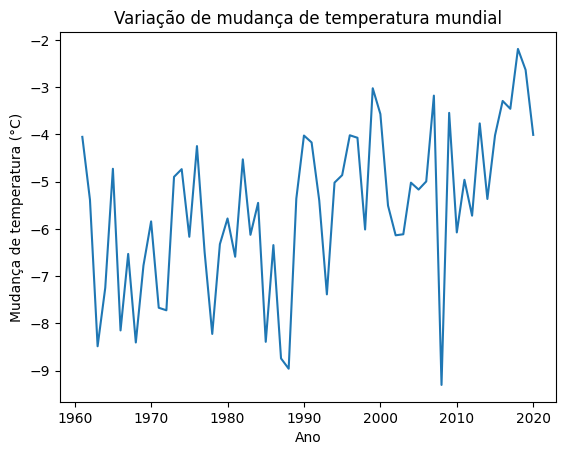

In [21]:
plt.plot(x,min_mundo)
plt.xlabel('Ano')
plt.ylabel('Mudança de temperatura (°C)')
plt.title('Variação de mudança de temperatura mundial')

# Variação da temperatura média de cada país ao longo dos anos

Para esse passo, vamos criar um dataframe apenas com as médias anuais de cada país. Em seguida, a visualização dos dados se derá por meio de um mapa interativo no qual será possível ver as variações médias referentes aquele ano.

In [22]:
# Filtra os dados para mostrar apenas a média anual de determinado país dado um ano.
filtered_base = base.query('Months == "Meteorological year"')
filtered_base

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
960,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1961,1961,?C,-0.121,Fc,Calculated data
961,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1962,1962,?C,-0.171,Fc,Calculated data
962,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1963,1963,?C,0.841,Fc,Calculated data
963,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1964,1964,?C,-0.779,Fc,Calculated data
964,ET,Temperature change,2,Afghanistan,7271,Temperature change,7020,Meteorological year,1965,1965,?C,-0.254,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229920,ET,Temperature change,181,Zimbabwe,7271,Temperature change,7020,Meteorological year,2016,2016,?C,1.470,Fc,Calculated data
229921,ET,Temperature change,181,Zimbabwe,7271,Temperature change,7020,Meteorological year,2017,2017,?C,0.443,Fc,Calculated data
229922,ET,Temperature change,181,Zimbabwe,7271,Temperature change,7020,Meteorological year,2018,2018,?C,0.747,Fc,Calculated data
229923,ET,Temperature change,181,Zimbabwe,7271,Temperature change,7020,Meteorological year,2019,2019,?C,1.359,Fc,Calculated data


In [23]:
# Usa a biblioteca plotly para criar um gráfico interativo.

fig = px.choropleth(filtered_base, locations="Area",
                        color="Value",
                        locationmode='country names',
                        hover_name="Area",
                        hover_data=['Value'],
                        animation_frame = "Year",
                        labels={'Value':'The Temperature Change', '°C':'°C'},
                        range_color=[-2, 4])

fig.show()

# CO2

Iremos analisar agora se há relação entre a concentração de CO2 na atmosfera e o aumento da temperatura média no Brasil. Para isso, utilizaremos os dados de concentração de CO2 Atmosférico tomados pelo observatório de Mauna Loa (https://gml.noaa.gov/ccgg/trends/), que têm o mais longo registro histórico dessas observações.

<img src="221129161121-02-mauna-loa-observatory-file.jpg" alt="Drawing" style="width: 500px;"/>


In [24]:
data_gas = pd.read_csv('Emissões de Gás\co2_annmean_mlo_clean.csv')
data_gas.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


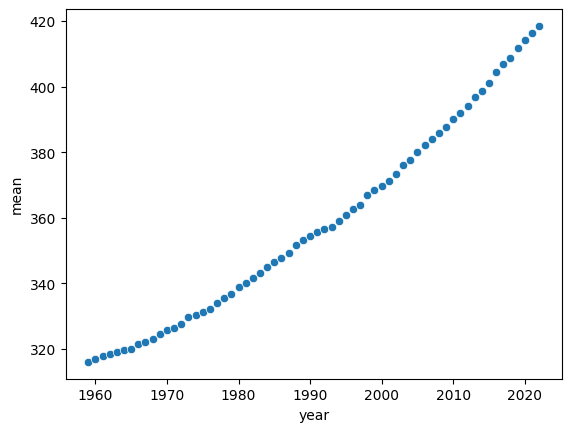

In [25]:
sns.scatterplot(data_gas,x='year',y='mean')
plt.show()

No gráfico acima é claro o crescente aumento da média de CO2 atmosférico ao redor do observatório, mas será se isso tem alguma relação com as temperaturas do Brasil?

In [26]:
brazil_data_yearly = base[(base['Area'] == 'Brazil') & (base['Months'] == 'Meteorological year')]
brazil_data_yearly.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
26392,ET,Temperature change,21,Brazil,7271,Temperature change,7020,Meteorological year,1961,1961,?C,0.170,Fc,Calculated data
26393,ET,Temperature change,21,Brazil,7271,Temperature change,7020,Meteorological year,1962,1962,?C,-0.191,Fc,Calculated data
26394,ET,Temperature change,21,Brazil,7271,Temperature change,7020,Meteorological year,1963,1963,?C,0.169,Fc,Calculated data
26395,ET,Temperature change,21,Brazil,7271,Temperature change,7020,Meteorological year,1964,1964,?C,-0.241,Fc,Calculated data
26396,ET,Temperature change,21,Brazil,7271,Temperature change,7020,Meteorological year,1965,1965,?C,-0.098,Fc,Calculated data


In [27]:
from scipy.stats import pearsonr
mauna_loa_co2_means = list(data_gas[(data_gas['year']>=1961) & (data_gas['year']<=2020)]['mean'])
brazil_temp_means = list(brazil_data_yearly['Value'])

correlation, p_value = pearsonr(mauna_loa_co2_means, brazil_temp_means)

print(f'A correlação é {correlation} com p-valor igual a {p_value}')

A correlação é 0.9219283149861414 com p-valor igual a 1.4557256703732268e-25


A correlação entre a média da variação de temperatura no Brasil e a variação da concentração de CO2 atmosférico em Mauna Loa é maior do que 90%!

Isso significa que o aumento de CO2 atmosférico causa o aumento de temperatura? Não necessariamente, mas é um indicativo importante de que esses eventos estão relacionados.

Apesar disso, análises mais sofisticadas já foram realizadas sobre esse assunto em geral, e a probabilidade de que esses eventos tenham uma relação de causalidade é considerável! (https://climate.nasa.gov/vital-signs/carbon-dioxide/)

# Top 10 - Mundo

In [28]:
variacao_por_ano_e_pais = base[base['Months'] == 'Meteorological year'][['Area','Year','Value']]
variacao_por_ano_e_pais

,Area,Year,Value
960,Afghanistan,1961,-0.121
961,Afghanistan,1962,-0.171
962,Afghanistan,1963,0.841
963,Afghanistan,1964,-0.779
964,Afghanistan,1965,-0.254
...,...,...,...
229920,Zimbabwe,2016,1.470
229921,Zimbabwe,2017,0.443
229922,Zimbabwe,2018,0.747
229923,Zimbabwe,2019,1.359


In [29]:
medias_temp = variacao_por_ano_e_pais.groupby('Area').agg({'Value': 'mean'})
medias_temp.reset_index(inplace=True)
medias_temp.sort_values(by='Value', ascending=False).head(10)

,Area,Value
194,Serbia,1.548533
127,Luxembourg,1.537619
144,Montenegro,1.510267
72,Estonia,1.500414
182,Russian Federation,1.490828
19,Belarus,1.488448
200,Slovenia,1.484724
20,Belgium,1.476238
120,Latvia,1.460103
126,Lithuania,1.435345
